# Predicting phone sales
This notebook uses a perceptron to show why retraining can be harder than training in a changing environment. To this end, the notebook trains and retrains a perceptron to decide whether a customer will buy a particular mobile phone.

## Setup environment

In [171]:
# Imports
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [172]:
# Paths
DATA_PATH = "./data"
IMG_INITIAL_PATH = f"{DATA_PATH}/phone_sales_initial.png"
IMG_RETRAIN_PATH = f"{DATA_PATH}/phone_sales_retraining.png"
IMG_COMPARISON_PATH = f"{DATA_PATH}/phone_sales_comparison.png"

In [173]:
"""
This function partially trains a perceptron n times and returns the weights of every iteration
in a pandas data frame.
"""
def train_perceptron(perceptron, features, target, iterations):
    keypad_weights = []
    touch_weights = []
    low_price_weights = []
    
    for i in range(0, iterations):
        if hasattr(perceptron, "coef_"):
            keypad_weights.append(perceptron.coef_[0][0])
            touch_weights.append(perceptron.coef_[0][1])
            low_price_weights.append(perceptron.coef_[0][2])
        else:
            keypad_weights.append(0)
            touch_weights.append(0)
            low_price_weights.append(0)
        
        perceptron.partial_fit(features, target, classes=np.unique(target))

    return pd.DataFrame({
        "iteration": range(0, iterations),
        "keypad": keypad_weights,
        "touch": touch_weights,
        "low_price": low_price_weights
    })

## Create training data

In [174]:
# Create phone 2000 sales data
phone_frame = pd.DataFrame({
    "keypad": [1, 1, 0, 0],
    "touch": [0, 0, 1, 1],
    "low_price": [1, 0, 0, 1],
    "sale": [1, 0, 0, 0]
})

phone_frame.index.name = "ID"
phone_frame.to_csv(sys.stdout)

ID,keypad,touch,low_price,sale
0,1,0,1,1
1,1,0,0,0
2,0,1,0,0
3,0,1,1,0


In [175]:
# Create changed 2007 phone sales data
phone_frame_new = pd.DataFrame({
    "keypad": [1, 1, 0, 0],
    "touch": [0, 0, 1, 1],
    "low_price": [1, 0, 0, 1],
    "sale": [0, 0, 1, 1]
})

phone_frame_new.index.name = "ID"
phone_frame_new.to_csv(sys.stdout)

ID,keypad,touch,low_price,sale
0,1,0,1,0
1,1,0,0,0
2,0,1,0,1
3,0,1,1,1


## Initial training

In [176]:
# Initialize a perceptron model without bias
perceptron = Perceptron(fit_intercept=False)

In [177]:
# Initial training parameters
x = phone_frame[["keypad", "touch", "low_price"]]
y = phone_frame["sale"]

In [178]:
# Perform training
weights_initial = train_perceptron(perceptron, x, y, iterations=10)
print(weights_initial)

   iteration  keypad  touch  low_price
0          0     0.0    0.0        0.0
1          1     0.0   -1.0        0.0
2          2     0.0   -1.0        1.0
3          3     0.0   -2.0        1.0
4          4     0.0   -2.0        2.0
5          5     0.0   -3.0        2.0
6          6    -1.0   -3.0        2.0
7          7    -1.0   -3.0        2.0
8          8    -1.0   -3.0        2.0
9          9    -1.0   -3.0        2.0


In [179]:
# Test model
y_pred = perceptron.predict(x)
print(y_pred)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[1 0 0 0]
Accuracy: 100.00%


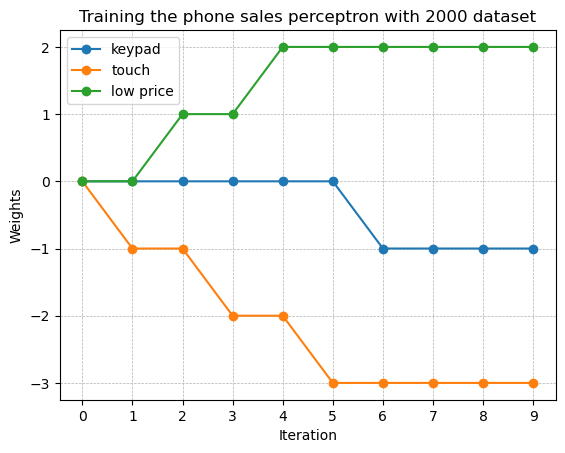

In [180]:
# Visualize training process
plt.title("Training the phone sales perceptron with 2000 dataset")
plt.plot(weights_initial['iteration'], weights_initial['keypad'], label='keypad', marker='o')
plt.plot(weights_initial['iteration'], weights_initial['touch'], label='touch', marker='o')
plt.plot(weights_initial['iteration'], weights_initial['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_initial['iteration'])

plt.savefig(IMG_INITIAL_PATH, dpi=300)
plt.show()

## Retraining with 2007 dataset

In [181]:
# Changed training parameters
x = phone_frame_new[["keypad", "touch", "low_price"]]
y = phone_frame_new["sale"]

In [182]:
# Retrain with 2007 dataset
weights_changed = train_perceptron(perceptron, x, y, iterations=10)
print(weights_changed)

   iteration  keypad  touch  low_price
0          0    -1.0   -3.0        2.0
1          1    -2.0   -1.0        2.0
2          2    -3.0    0.0        1.0
3          3    -3.0    1.0        1.0
4          4    -3.0    1.0        1.0
5          5    -3.0    1.0        1.0
6          6    -3.0    1.0        1.0
7          7    -3.0    1.0        1.0
8          8    -3.0    1.0        1.0
9          9    -3.0    1.0        1.0


In [183]:
# Test retrained model
y_pred = perceptron.predict(x)
print(y_pred)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[0 0 1 1]
Accuracy: 100.00%


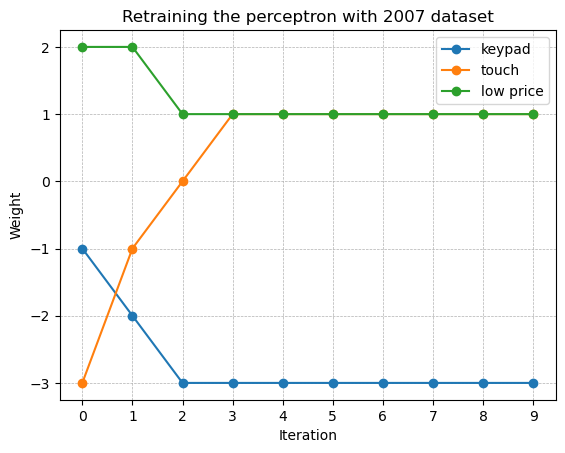

In [184]:
# Plot training process
plt.title("Retraining the perceptron with 2007 dataset")
plt.plot(weights_changed['iteration'], weights_changed['keypad'], label='keypad', marker='o')
plt.plot(weights_changed['iteration'], weights_changed['touch'], label='touch', marker='o')
plt.plot(weights_changed['iteration'], weights_changed['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_changed['iteration'])

plt.savefig(IMG_RETRAIN_PATH, dpi=300)
plt.show()

## Training from scratch with 2007 dataset

In [185]:
# Create a new perceptron
perceptron_new = Perceptron(fit_intercept=False)

In [186]:
# Train from scratch with 2007 dataset
weights_new = train_perceptron(perceptron_new, x, y, iterations=10)
print(weights_new)

   iteration  keypad  touch  low_price
0          0     0.0    0.0        0.0
1          1    -2.0    1.0        0.0
2          2    -2.0    1.0        0.0
3          3    -2.0    1.0        0.0
4          4    -2.0    1.0        0.0
5          5    -2.0    1.0        0.0
6          6    -2.0    1.0        0.0
7          7    -2.0    1.0        0.0
8          8    -2.0    1.0        0.0
9          9    -2.0    1.0        0.0


In [187]:
# Test model
y_pred = perceptron_new.predict(x)
print(y_pred)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[0 0 1 1]
Accuracy: 100.00%


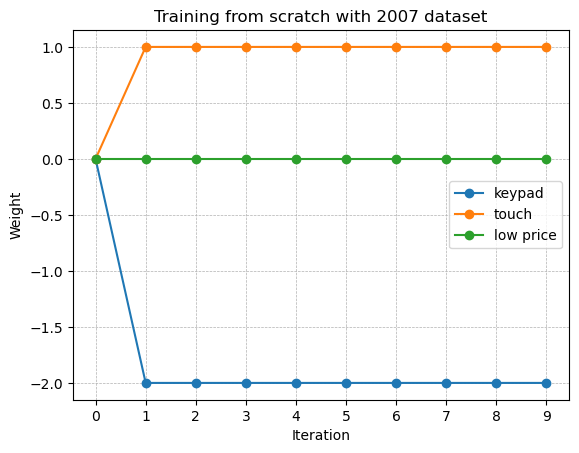

In [188]:
# Plot training process
plt.title("Training from scratch with 2007 dataset")
plt.plot(weights_new['iteration'], weights_new['keypad'], label='keypad', marker='o')
plt.plot(weights_new['iteration'], weights_new['touch'], label='touch', marker='o')
plt.plot(weights_new['iteration'], weights_new['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_new['iteration'])
plt.show()

## Compare retraining with training from scratch

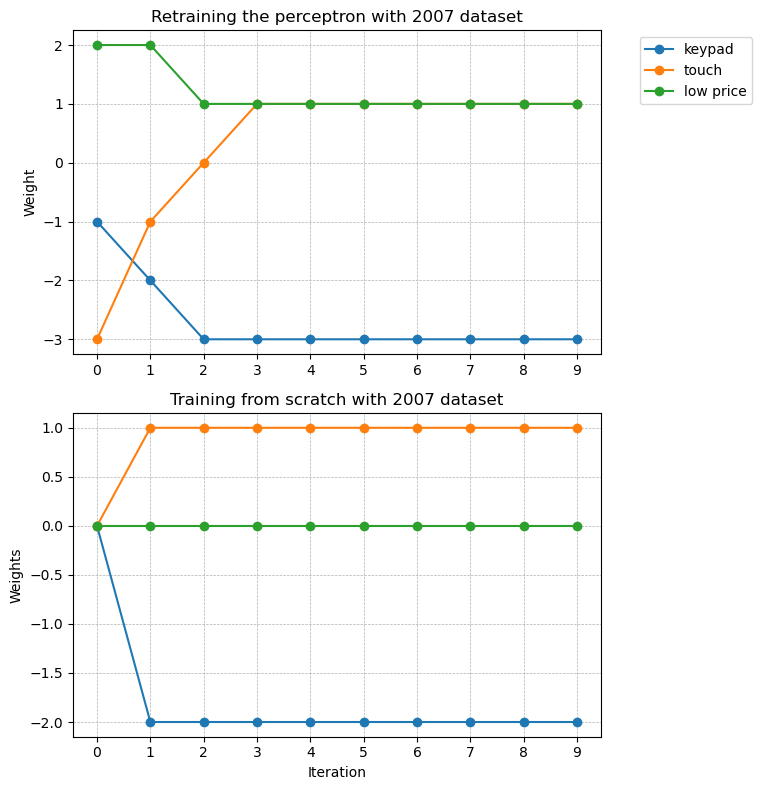

In [189]:
# Plot both learning processes in one chart
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plotting for the first dataset in the top subplot
axs[0].set_title('Retraining the perceptron with 2007 dataset')
axs[0].plot(weights_changed['iteration'], weights_changed['keypad'], label='keypad', marker='o')
axs[0].plot(weights_changed['iteration'], weights_changed['touch'], label='touch', marker='o')
axs[0].plot(weights_changed['iteration'], weights_changed['low_price'], label='low price', marker='o')
axs[0].set_xlabel('')
axs[0].set_ylabel('Weight')
axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_xticks(weights_changed['iteration'])

# Plotting for the second dataset in the bottom subplot
axs[1].set_title('Training from scratch with 2007 dataset')
axs[1].plot(weights_new['iteration'], weights_new['keypad'], label='keypad', marker='o')
axs[1].plot(weights_new['iteration'], weights_new['touch'], label='touch', marker='o')
axs[1].plot(weights_new['iteration'], weights_new['low_price'], label='low price', marker='o')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Weights')
# axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_xticks(weights_new['iteration'])

# Adjust layout for better spacing
plt.tight_layout()

# Save img and show the plot
plt.savefig(IMG_COMPARISON_PATH, dpi=300)
plt.show()